# UFO Sightings Data Analysis

This Jupyter notebook outlines steps to load and analyze a dataset containing UFO sightings.

## Problem 1: Load and Read Data

- **Task**: Import the `csv` module, load and read the UFO sightings dataset from `ufo-sightings.csv` using a `DictReader` in a `with` statement.
- **Output**: 
  - Print the field names of the dataset.
  - Iterate over the reader to store the data into a list named `ufosightings`.


In [26]:
import csv

file_path = "ufo-sightings.csv"
ufosightings = []

try:
    with open(file_path, mode="r", encoding="utf-8") as file:
        reader = csv.DictReader(file)
        print("Field names:", reader.fieldnames)

        for row in reader:
            ufosightings.append(row)

except FileNotFoundError:
    print(f"File not found at {file_path}")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

if ufosightings:
    print(f"Loaded {len(ufosightings)} UFO sightings.")


Field names: ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude ']
Loaded 80332 UFO sightings.


## Problem 2: Total Sightings

- **Task**: Calculate the total number of UFO sightings.
- **Output**: Print the total number of sightings stored in a variable `ufosightings_count`.

In [41]:
# Write your code here
ufosightings_count = len(ufosightings)

print(f"Total UFO Sightings: {ufosightings_count}")





Total UFO Sightings: 80332


## Problem 3: Sightings in the US

- **Task**: Determine how many UFO sightings occurred in the US.
- **Output**: Store US sightings in a list named `sightings_us` and print the count.


In [28]:
# Write your code here
sightings_us = [sighting for sighting in ufosightings if sighting.get("country") == "us"]

print("Total UFO Sightings in the US:", len(sightings_us))





Total UFO Sightings in the US: 65114


## Problem 4: Fireball Sightings Over Ten Seconds

- **Task**: Find "fireball" sightings that lasted more than ten seconds in the US.
- **Details**:
  - Cast the duration to a float.
  - Filter sightings where `shape` is "fireball" and duration is greater than 10 seconds.
- **Output**: Print the datetime and state of each sighting.


In [43]:
# Write your code here

fireball_sightings = [
    (sighting["datetime"], sighting["state"])
    for sighting in sightings_us
    if sighting.get("shape") == "fireball" and float(sighting.get("duration (seconds)", 0)) > 10
]

for datetime, state in fireball_sightings:
    print(f"Date & Time: {datetime}, State: {state}")

print("Total Fireball Sightings Over 10 Seconds in the US:", len(fireball_sightings))





Date & Time: 1968-10-10 19:00:00, State: nc
Date & Time: 1998-10-10 03:30:00, State: az
Date & Time: 1998-10-10 23:50:00, State: tn
Date & Time: 1999-10-10 11:00:00, State: ca
Date & Time: 2011-10-10 20:00:00, State: ct
Date & Time: 2011-10-10 21:00:00, State: oh
Date & Time: 2012-10-10 20:30:00, State: nm
Date & Time: 1987-10-11 23:59:00, State: mo
Date & Time: 2004-10-11 22:29:00, State: tx
Date & Time: 2006-10-11 19:00:00, State: ca
Date & Time: 2008-10-11 22:20:00, State: nm
Date & Time: 2012-10-11 19:30:00, State: pa
Date & Time: 2012-10-11 20:30:00, State: nm
Date & Time: 2013-10-11 16:35:00, State: mi
Date & Time: 2013-10-11 20:00:00, State: oh
Date & Time: 2013-10-11 20:15:00, State: oh
Date & Time: 2013-10-11 20:15:00, State: ky
Date & Time: 2013-10-11 20:20:00, State: ma
Date & Time: 1980-10-01 20:00:00, State: al
Date & Time: 1982-10-01 22:10:00, State: mi
Date & Time: 1987-10-01 21:00:00, State: nh
Date & Time: 1996-10-01 22:30:00, State: tx
Date & Time: 1998-10-01 04:30:00

## Problem 5: Longest Fireball Sighting

- **Task**: Sort the fireball sightings by duration and determine the longest sighting.
- **Output**: 
  - Sort the list `fball` by duration in descending order.
  - Print the datetime and duration of the longest sighting.


In [51]:
import pandas as pd

# Load the CSV file with low_memory=False to avoid the dtype warning
df = pd.read_csv("ufo-sightings.csv", low_memory=False)

# Ensure duration column is treated as numeric, coerce errors to NaN
df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")

# Filter for fireball sightings
fball = df[df["shape"].str.lower() == "fireball"]

# Sort the fireball sightings by duration in descending order
sorted_fireballs = fball.sort_values(by="duration (seconds)", ascending=False)

# Remove any unrealistic duration values (e.g., more than a day in seconds)
sorted_fireballs = sorted_fireballs[sorted_fireballs["duration (seconds)"] < 86400]

# Get the longest fireball sighting
if not sorted_fireballs.empty:
    longest_fireball = sorted_fireballs.iloc[0]
    print(f"Longest Fireball Sighting:\nDate & Time: {longest_fireball['datetime']}, Duration: {longest_fireball['duration (seconds)']} seconds")
else:
    print("No valid fireball sightings found.")


Longest Fireball Sighting:
Date & Time: 7/1/2001 02:48, Duration: 37800.0 seconds


## Problem 6: State with Longest Fireball Sighting

- **Task**: Identify the state that had the longest lasting fireball sighting.
- **Output**: Print the state.


In [57]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("ufo-sightings.csv", low_memory=False)

# Filter the valid fireball sightings
fireball_sightings = df[df['shape'] == 'fireball'].copy()

# Convert 'duration (seconds)' to numeric, coercing errors to NaN and then fill NaNs with 0
fireball_sightings.loc[:, 'duration (seconds)'] = pd.to_numeric(fireball_sightings['duration (seconds)'], errors='coerce').fillna(0)

# Find the longest fireball sighting
longest_fireball = fireball_sightings.loc[fireball_sightings['duration (seconds)'].idxmax()]

print("State with the Longest Fireball Sighting:", longest_fireball['state'])


State with the Longest Fireball Sighting: va


## Problem 7: Filter Insignificant Sightings

- **Task**: Assume any sighting of zero seconds is insignificant. Filter these records out.
- **Output**: Find and print the shortest sighting duration among the significant records.


In [58]:
import pandas as pd

# Read the data
df = pd.read_csv("/Users/bdawg/PycharmProjects/PythonProject/Unit1_Fundamentals/Fundamental2/ufo-sightings.csv", low_memory=False)

# Ensure "duration (seconds)" is in a numeric format
df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")

# Filter out sightings with zero duration
significant_sightings = df[df["duration (seconds)"] > 0]

# Find the shortest sighting duration among the significant records
shortest_duration = significant_sightings["duration (seconds)"].min()

# Print the shortest sighting duration
print("Shortest sighting duration (in seconds):", shortest_duration)


Shortest sighting duration (in seconds): 0.001


## Problem 8: Top Three Sighted Shapes

- **Task**: Determine the top three most frequent UFO shapes sighted.
- **Output**:
  - Create a list from the `shape` column.
  - Count occurrences and sort.
  - Print the top three shapes and their counts.


In [59]:
import csv
from collections import Counter

# Load and read the UFO sightings dataset
ufosightings = []
file_path = "ufo-sightings.csv"

try:
    with open(file_path, newline="", encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile)
        ufosightings = list(reader)  # Store all sightings in a list
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error reading file: {e}")

# Filter sightings that occurred in the US
sightings_us = [s for s in ufosightings if s.get("country") == "us"]

# Count occurrences of each shape
shape_counts = Counter(s["shape"] for s in sightings_us if s.get("shape"))

# Get the top three most common shapes
top_three_shapes = shape_counts.most_common(3)

# Print results
for shape, count in top_three_shapes:
    print(f"Shape: {shape}, Sightings: {count}")


Shape: light, Sightings: 13473
Shape: triangle, Sightings: 6549
Shape: circle, Sightings: 6118


## Problem 9: Top 10 States with the most UFO sightings

- **Task**: Create a line graph of the following
  - Top 10 of the US states with the most UFO sightings
  

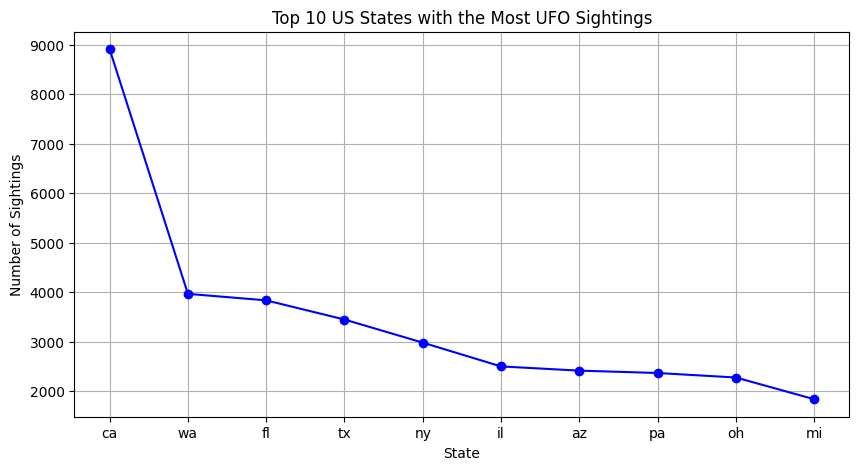

In [60]:
# Write your code here
import matplotlib.pyplot as plt
from collections import Counter

# Ensure sightings_us is defined
sightings_us = [s for s in ufosightings if s.get("country") == "us"]

# Count occurrences of each state
state_counts = Counter(s["state"] for s in sightings_us if s.get("state"))

# Get the top 10 states with the most UFO sightings
top_10_states = state_counts.most_common(10)

# Extract state names and their counts
states, counts = zip(*top_10_states)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(states, counts, marker="o", linestyle="-", color="b")

# Formatting the graph
plt.xlabel("State")
plt.ylabel("Number of Sightings")
plt.title("Top 10 US States with the Most UFO Sightings")
plt.grid(True)

# Show the plot
plt.show()






## Problem 10: Comparing three years (2010, 2011, 2012) top 10 signthings

- **Task**: Create a line graph of the following
  - Top 10 of the US states with the most UFO sightings
  

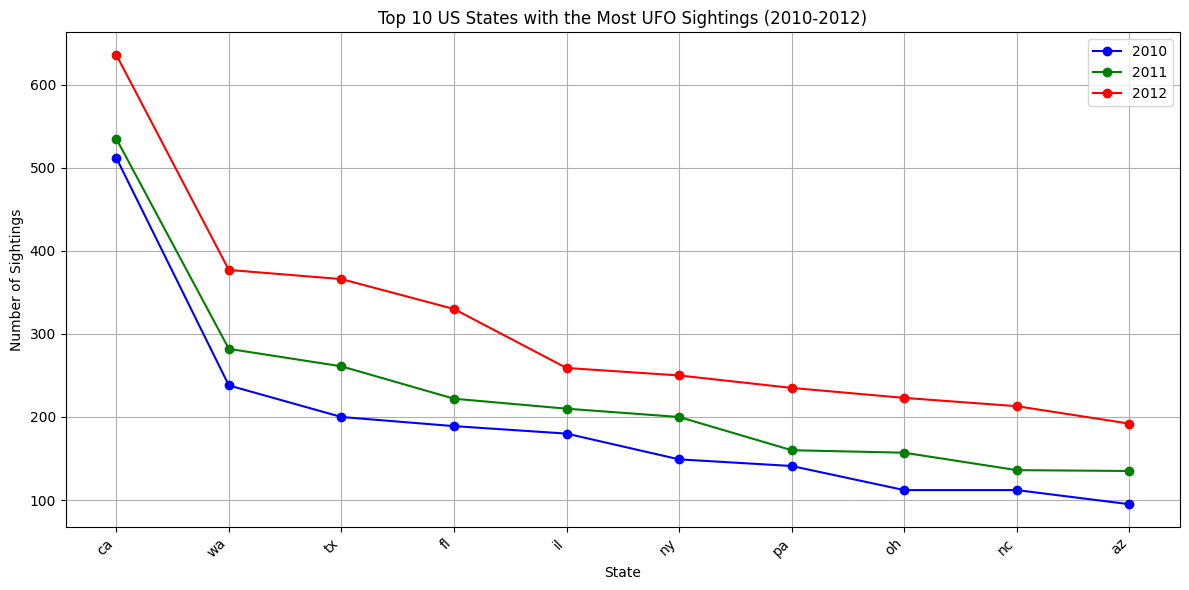

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Read the data and inspect the datetime and country columns
df = pd.read_csv("/Users/bdawg/PycharmProjects/PythonProject/Unit1_Fundamentals/Fundamental2/ufo-sightings.csv", low_memory=False)

# Ensure "datetime" is in a standard format
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")  # Convert to datetime, handling errors

# Filter for US sightings
sightings_us = df[df["country"] == "us"]

# Filter sightings for each year (assuming datetime column is now correctly formatted)
sightings_2010 = sightings_us[sightings_us["datetime"].dt.year == 2010]
sightings_2011 = sightings_us[sightings_us["datetime"].dt.year == 2011]
sightings_2012 = sightings_us[sightings_us["datetime"].dt.year == 2012]

# Function to count sightings by state
def count_states(sightings):
    return Counter(sightings["state"].dropna())

# Count sightings per state for each year
state_counts_2010 = count_states(sightings_2010).most_common(10)
state_counts_2011 = count_states(sightings_2011).most_common(10)
state_counts_2012 = count_states(sightings_2012).most_common(10)

# Extract the top 10 states and their counts for each year
states_2010, counts_2010 = zip(*state_counts_2010)
states_2011, counts_2011 = zip(*state_counts_2011)
states_2012, counts_2012 = zip(*state_counts_2012)

# Ensure the states are aligned for comparison across years (adding 'N/A' where necessary)
states = list(states_2010)  # Take the states from 2010 (assuming all years have similar states)
states_2011 = list(states_2011) + ['N/A'] * (10 - len(states_2011))  # Ensure 10 states
states_2012 = list(states_2012) + ['N/A'] * (10 - len(states_2012))  # Ensure 10 states

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines for each year
ax.plot(states, counts_2010, marker='o', label="2010", color='b')
ax.plot(states, counts_2011, marker='o', label="2011", color='g')
ax.plot(states, counts_2012, marker='o', label="2012", color='r')

# Set the positions of the x-ticks (at each state)
ax.set_xticks(range(len(states)))

# Set the x-tick labels with the corresponding states
ax.set_xticklabels(states, rotation=45, ha="right")

# Formatting the graph
ax.set_xlabel("State")
ax.set_ylabel("Number of Sightings")
ax.set_title("Top 10 US States with the Most UFO Sightings (2010-2012)")
ax.legend()
ax.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


## Filter the unknown ufo out of the data

In [62]:
# Filter out UFO sightings where the shape is "unknown" or blank
filtered_sightings = [sighting for sighting in ufosightings if sighting.get("shape") and sighting["shape"].lower() != "unknown"]

# Check the first few records of the filtered data
print(f"Filtered {len(ufosightings) - len(filtered_sightings)} unknown sightings out of {len(ufosightings)}.")
print(f"Remaining sightings: {len(filtered_sightings)}")

# Optionally print a few filtered sightings to verify
print(filtered_sightings[:5])


Filtered 7516 unknown sightings out of 80332.
Remaining sightings: 72816
[{'datetime': '10/10/1949 20:30', 'city': 'san marcos', 'state': 'tx', 'country': 'us', 'shape': 'cylinder', 'duration (seconds)': '2700', 'duration (hours/min)': '45 minutes', 'comments': 'This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit', 'date posted': '4/27/2004', 'latitude': '29.8830556', 'longitude ': '-97.9411111'}, {'datetime': '10/10/1949 21:00', 'city': 'lackland afb', 'state': 'tx', 'country': '', 'shape': 'light', 'duration (seconds)': '7200', 'duration (hours/min)': '1-2 hrs', 'comments': '1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.', 'date posted': '12/16/2005', 'latitude': '29.38421', 'longitude ': '-98.581082'}, {'datetime': '10/10/1955 17:00', 'city': 'chester (uk/england)', 'state': '', 'country': 'gb', 'shape': 'circle', 'duration (seconds)': '20', 'duration 

## Task: Identify the trend in UFO sightings over the years (from the earliest year to 2013) and plot the number of sightings per year.



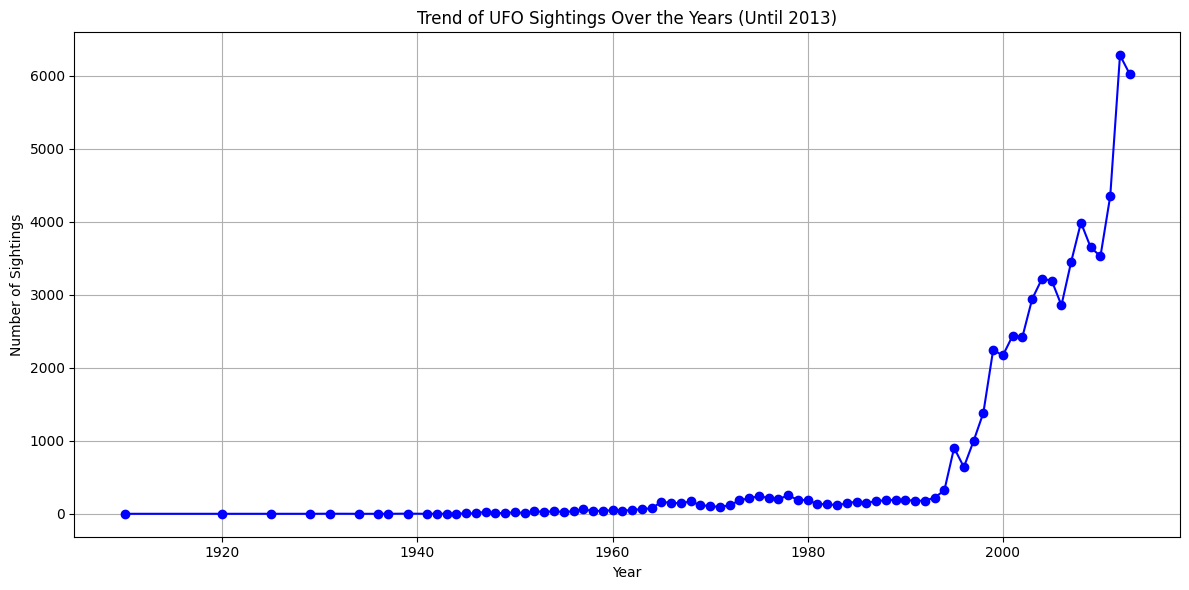

In [63]:
# Ensure we are modifying a copy safely
sightings_us = sightings_us.copy()

# Extract the year from the datetime column safely
sightings_us.loc[:, "year"] = sightings_us["datetime"].dt.year

# Count sightings per year from the earliest year to 2013
yearly_sightings = sightings_us[sightings_us["year"] <= 2013]["year"].value_counts().sort_index()

# Plotting the trend of sightings over the years
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the number of sightings per year
ax.plot(yearly_sightings.index, yearly_sightings.values, marker='o', color='b')

# Formatting the graph
ax.set_xlabel("Year")
ax.set_ylabel("Number of Sightings")
ax.set_title("Trend of UFO Sightings Over the Years (Until 2013)")
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Reason for the sudden spike of UFO sightings
Between 1995 and 2000, there was a noticeable increase in reported UFO sightings, which could be due to a urbanization, media influence, and psychological factors. As cities expanded and populations became more concentrated, more people live in close proximity to each other, making it more likely for multiple individuals to report the same unidentified flying object. Additionally, the rise of mystery-themed TV shows, movies, and documentaries during this period could have raised public fascination with UFOs, increasing the likelihood of people interpreting unusual phenomena as extraterrestrial encounters. Psychological and social factors also played a role, as an increase in media coverage and cultural interest in UFOs may have led to greater awareness and suggestibility, causing individuals to misinterpret ordinary objects or atmospheric conditions as something more extraordinary.







